Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Diabetes_data = pd.read_csv('/content/Diabetes - Diabetes.csv')
Diabetes_data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
Diabetes_data_drop = Diabetes_data.drop(['SkinThickness','Pregnancies'],axis=1)
Diabetes_data_drop

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,101,76,180,32.9,0.171,63,0
764,122,70,0,36.8,0.340,27,0
765,121,72,112,26.2,0.245,30,0
766,126,60,0,30.1,0.349,47,1


Drop 0

In [ ]:
diabetes_mod = Diabetes_data_drop[(Diabetes_data_drop.BloodPressure != 0) & (Diabetes_data_drop.BMI != 0) & (Diabetes_data_drop.Insulin != 0) & (Diabetes_data_drop.Glucose != 0)]


In [ ]:
diabetes_mod

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1
6,78,50,88,31.0,0.248,26,1
8,197,70,543,30.5,0.158,53,1
13,189,60,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...
753,181,88,510,43.3,0.222,26,1
755,128,88,110,36.5,1.057,37,1
760,88,58,16,28.4,0.766,22,0
763,101,76,180,32.9,0.171,63,0


In [ ]:
diabetes_mod.to_csv('cleanedlaeew_insurance.csv', index=False)

Modeling

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(diabetes_mod.iloc[:,:-1], diabetes_mod.iloc[:,-1:], test_size=0.3, random_state=12)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(274, 6)
(118, 6)


In [ ]:
print(x_train)

     Glucose  BloodPressure  Insulin   BMI  DiabetesPedigreeFunction  Age
99       122             90      220  49.7                     0.325   31
651      117             60      106  33.8                     0.466   27
442      117             64      120  33.2                     0.230   24
692      121             70       95  39.1                     0.886   23
25       125             70      115  31.1                     0.205   41
..       ...            ...      ...   ...                       ...  ...
277      104             64      116  27.8                     0.454   23
469      154             78      140  46.1                     0.571   27
497       81             72       76  30.1                     0.547   25
312      155             74       96  26.6                     0.433   27
647      179             50      159  37.8                     0.455   22

[274 rows x 6 columns]


In [ ]:
print(y_train)

     Outcome
99         1
651        0
442        0
692        0
25         1
..       ...
277        0
469        0
497        0
312        1
647        1

[274 rows x 1 columns]


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([180,  94]))

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=12) 

In [ ]:
model = model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.predict_proba(x_test)

array([[0.60451317, 0.39548683],
       [0.71159157, 0.28840843],
       [0.86686405, 0.13313595],
       [0.14255887, 0.85744113],
       [0.5909338 , 0.4090662 ],
       [0.73869022, 0.26130978],
       [0.74357024, 0.25642976],
       [0.88338135, 0.11661865],
       [0.23572623, 0.76427377],
       [0.82432477, 0.17567523],
       [0.28227701, 0.71772299],
       [0.86152906, 0.13847094],
       [0.72934811, 0.27065189],
       [0.81326823, 0.18673177],
       [0.81745428, 0.18254572],
       [0.77258763, 0.22741237],
       [0.68903896, 0.31096104],
       [0.81970951, 0.18029049],
       [0.51688579, 0.48311421],
       [0.38828579, 0.61171421],
       [0.67034281, 0.32965719],
       [0.79176786, 0.20823214],
       [0.46125243, 0.53874757],
       [0.77817218, 0.22182782],
       [0.69661225, 0.30338775],
       [0.82706703, 0.17293297],
       [0.90250233, 0.09749767],
       [0.70583193, 0.29416807],
       [0.26376047, 0.73623953],
       [0.71411868, 0.28588132],
       [0.

In [ ]:
model.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
model.score(x_test, y_test)

0.7966101694915254

In [ ]:
confusion_matrix(y_test, model.predict(x_test))

array([[76,  6],
       [18, 18]])

In [ ]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        82
           1       0.75      0.50      0.60        36

    accuracy                           0.80       118
   macro avg       0.78      0.71      0.73       118
weighted avg       0.79      0.80      0.78       118



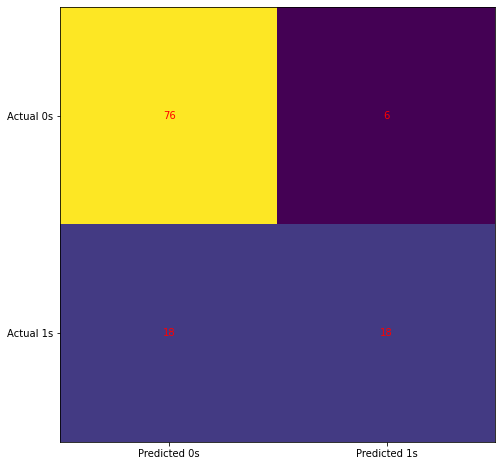

In [ ]:
cm = confusion_matrix(y_test, model.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Text(91.68, 0.5, 'predicted label')

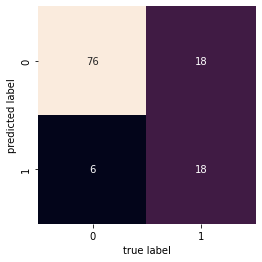

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, )
plt.xlabel('true label')
plt.ylabel('predicted label')